# **FORMULA 1 PITSTOP ANALYSIS USING NUMPY,PANDAS, MPLB**

# **OVERVIEW**
This is a Formula 1 pit stop dataset containing information about races, teams, drivers, circuits, and pit stop timings from 1950 to 2020.
The task is to analyze pit stop performance trends, comparing durations across years, teams, and circuits.
Key metrics include average pit stop time, fastest pit stops, and the impact of pit stops on race outcomes.

In [92]:
#Importing dataset from kaggle
import kagglehub
rohanrao_formula_1_world_championship_1950_2020_path = kagglehub.dataset_download('rohanrao/formula-1-world-championship-1950-2020')

print('Dataset is imported successfully')

Dataset is imported successfully


In [93]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Loading the data
fpath = '/kaggle/input/formula-1-world-championship-1950-2020/'
races = pd.read_csv(f'{fpath}races.csv', parse_dates=['date'])
pitStops = pd.read_csv(f'{fpath}pit_stops.csv')
constructors = pd.read_csv(f'{fpath}constructors.csv')
results = pd.read_csv(f'{fpath}results.csv')
circuits = pd.read_csv(f'{fpath}circuits.csv')
drivers = pd.read_csv(f'{fpath}drivers.csv')

In [95]:
# DATA PREPROCESSING
races = races[['raceId', 'year', 'round', 'circuitId', 'name', 'date']]
pitStops['seconds'] = pitStops['milliseconds'] / 1000
pitStops = pitStops.merge(races, on='raceId', how='left')
pitStops = pitStops.merge(circuits[['circuitId', 'name']], on='circuitId', how='left', suffixes=('', '_circuit'))
pitStops = pitStops.merge(results[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'], how='left')
pitStops = pitStops.merge(constructors[['constructorId', 'name']], on='constructorId', how='left', suffixes=('', '_constructor'))
pitStops = pitStops[pitStops['seconds'] < 50]  # Remove outliers

In [109]:
print("Summary of Pit Stop Durations:")
print(pitStops['seconds'].describe())


Summary of Pit Stop Durations:
count    10820.000000
mean        24.355192
std          4.298000
min         12.897000
25%         21.859750
50%         23.420000
75%         25.601000
max         49.849000
Name: seconds, dtype: float64


In [111]:
print("Basic Info about pitStops Dataset:")
pitStops.info()


Basic Info about pitStops Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 10820 entries, 0 to 11370
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   raceId            10820 non-null  int64         
 1   driverId          10820 non-null  int64         
 2   stop              10820 non-null  int64         
 3   lap               10820 non-null  int64         
 4   time              10820 non-null  object        
 5   duration          10820 non-null  object        
 6   milliseconds      10820 non-null  int64         
 7   seconds           10820 non-null  float64       
 8   year              10820 non-null  int64         
 9   round             10820 non-null  int64         
 10  circuitId         10820 non-null  int64         
 11  name              10820 non-null  object        
 12  date              10820 non-null  datetime64[ns]
 13  name_circuit      10820 non-null  object      

In [112]:
constructor_counts = pitStops['name'].value_counts().head(10)
print("Top 10 Constructors by Number of Pit Stops:\n", constructor_counts)


Top 10 Constructors by Number of Pit Stops:
 name
Spanish Grand Prix      667
Hungarian Grand Prix    651
Bahrain Grand Prix      626
Singapore Grand Prix    539
Chinese Grand Prix      504
British Grand Prix      479
Belgian Grand Prix      475
Japanese Grand Prix     473
Abu Dhabi Grand Prix    446
Brazilian Grand Prix    440
Name: count, dtype: int64


In [106]:
print("Pit Stops Dataset Shape:", pitStops.shape)
pitStops.head()


Pit Stops Dataset Shape: (10820, 16)


,raceId,driverId,stop,lap,time,duration,milliseconds,seconds,year,round,circuitId,name,date,name_circuit,constructorId,name_constructor
0,841,153,1,1,17:05:23,26.898,26898,26.898,2011,1,1,Australian Grand Prix,2011-03-27,Albert Park Grand Prix Circuit,5,Toro Rosso
1,841,30,1,1,17:05:52,25.021,25021,25.021,2011,1,1,Australian Grand Prix,2011-03-27,Albert Park Grand Prix Circuit,131,Mercedes
2,841,17,1,11,17:20:48,23.426,23426,23.426,2011,1,1,Australian Grand Prix,2011-03-27,Albert Park Grand Prix Circuit,9,Red Bull
3,841,4,1,12,17:22:34,23.251,23251,23.251,2011,1,1,Australian Grand Prix,2011-03-27,Albert Park Grand Prix Circuit,6,Ferrari
4,841,13,1,13,17:24:10,23.842,23842,23.842,2011,1,1,Australian Grand Prix,2011-03-27,Albert Park Grand Prix Circuit,6,Ferrari


<ipython-input-108-b5c992d3dd1b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




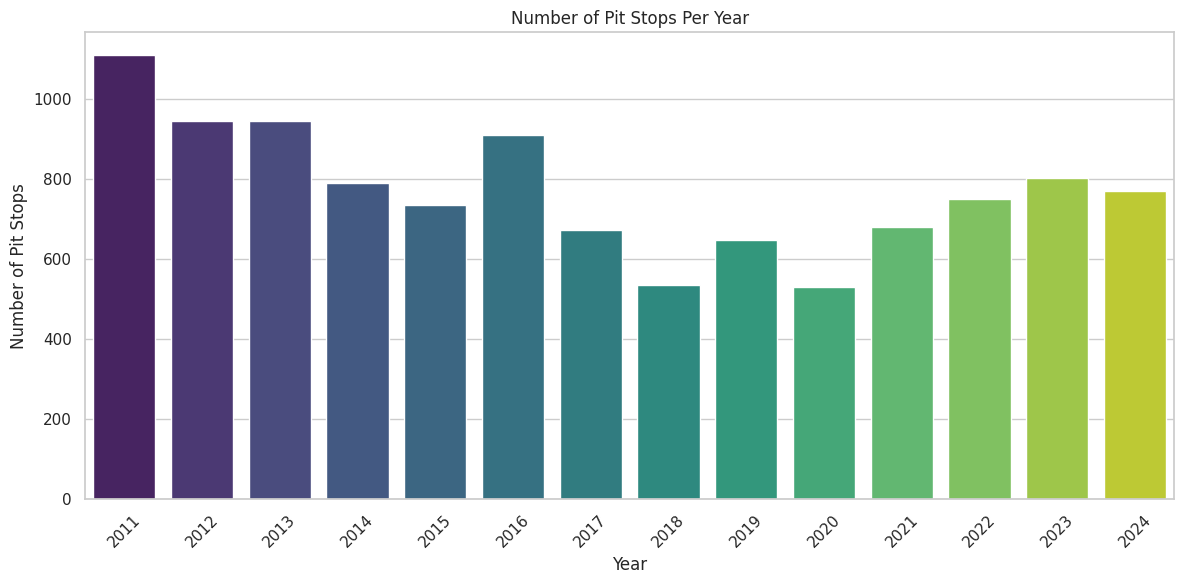

In [108]:
#distribution of pitstops per year
yearly_counts = pitStops['year'].value_counts().sort_index()
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette='viridis')
plt.title('Number of Pit Stops Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pit Stops')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **QUESTIONNAIRE**

# 1. How have pit stop durations evolved over time?

This shows how average pit stop durations have changed from 1950 to 2020, giving insights into improvements in efficiency and strategy.

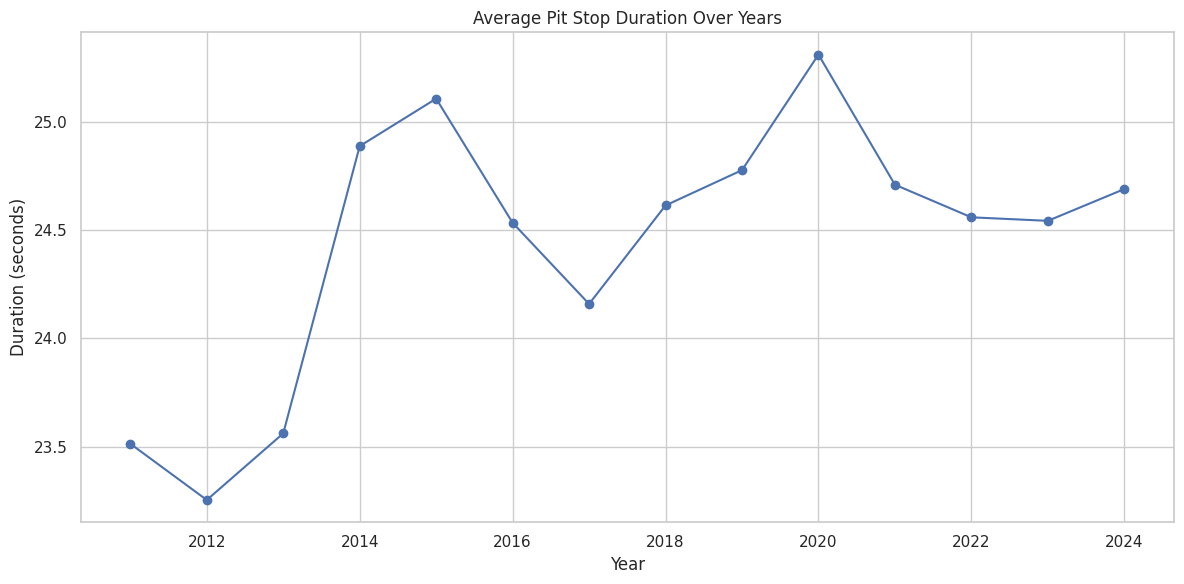

In [96]:
mean_durations = pitStops.groupby('year')['seconds'].mean().reset_index()
plt.plot(mean_durations['year'], mean_durations['seconds'], marker='o')
plt.title('Average Pit Stop Duration Over Years')
plt.xlabel('Year')
plt.ylabel('Duration (seconds)')
plt.tight_layout()
plt.show()


# 2. How do constructors influence pit stop durations?
This chart compares different constructors based on their average pit stop duration, highlighting which teams consistently execute quick stops.

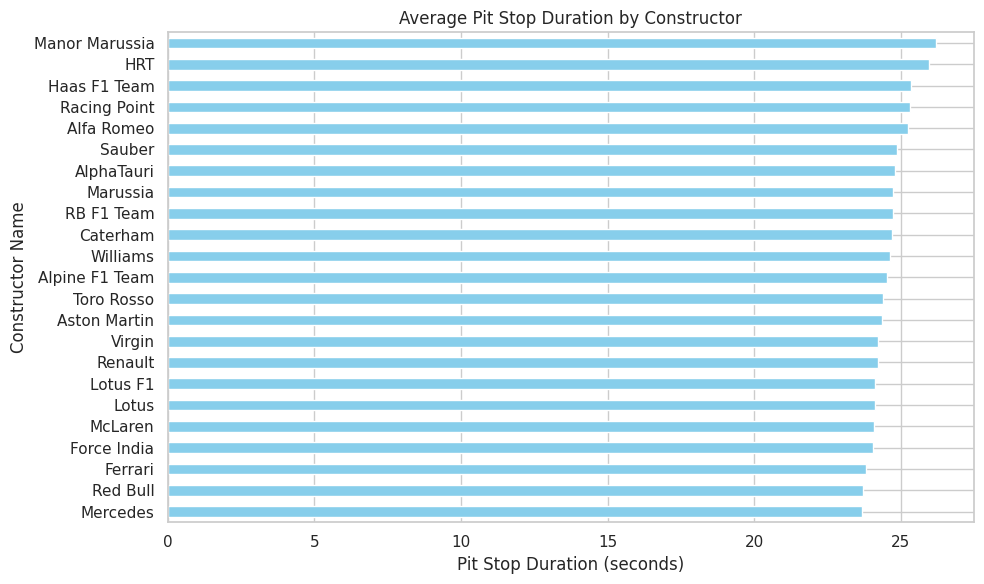

In [97]:
pitStops_with_constructors = pitStops.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
mean_by_constructor = pitStops_with_constructors.groupby('name_y')['seconds'].mean().sort_values()
plt.figure(figsize=(10, 6))
mean_by_constructor.plot(kind='barh', color='skyblue')
plt.title('Average Pit Stop Duration by Constructor')
plt.xlabel('Pit Stop Duration (seconds)')
plt.ylabel('Constructor Name')
plt.tight_layout()
plt.show()

# 3. Do different race circuits affect pit stop performance?
Some circuits may be trickier than others for pit crews. This graph shows how pit stop times vary by circuit.

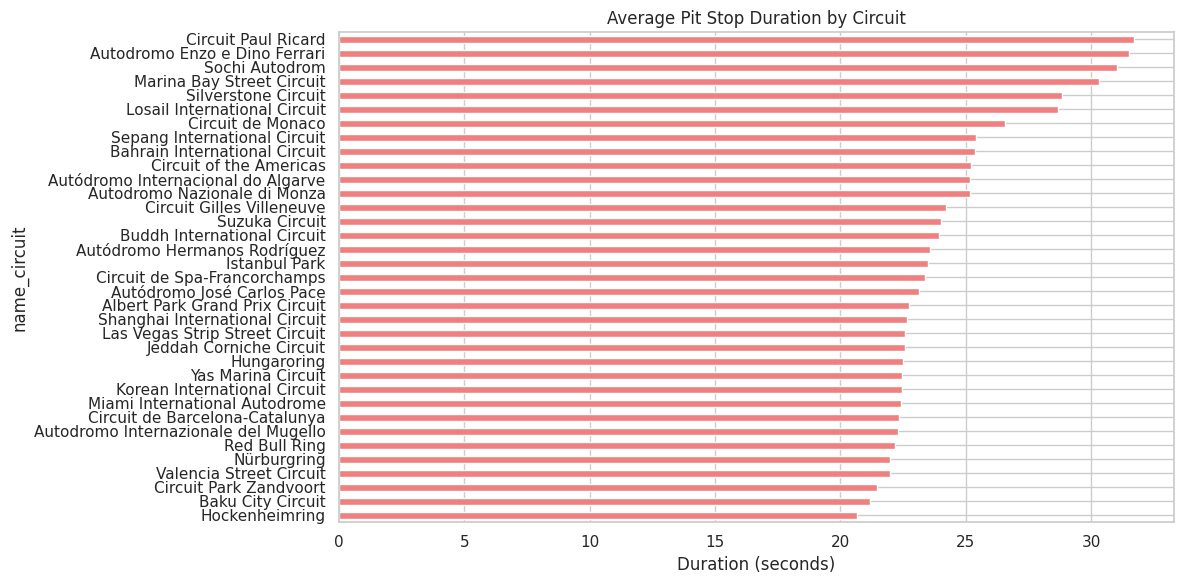

In [98]:
mean_by_circuit = pitStops.groupby('name_circuit')['seconds'].mean().sort_values()
mean_by_circuit.plot(kind='barh', color='lightcoral')
plt.title('Average Pit Stop Duration by Circuit')
plt.xlabel('Duration (seconds)')
plt.tight_layout()
plt.show()


# 4. What percentage of race time is spent in the pit lane?
Pit time as a proportion of race time shows how crucial quick stops are for race strategy.

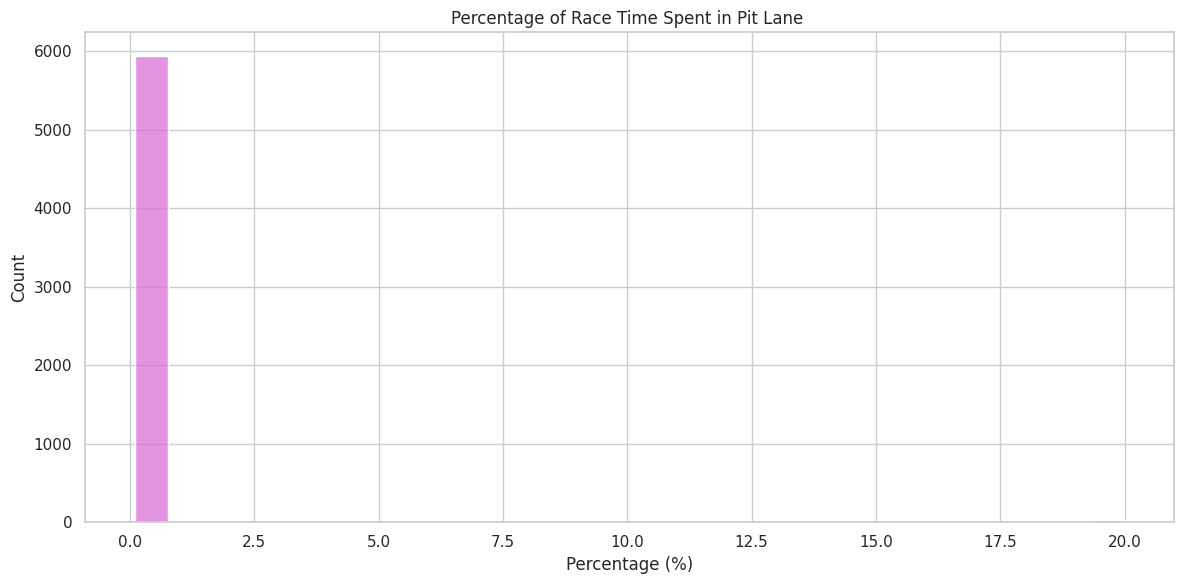

In [114]:
pit_merged = pitStops.merge(results[['raceId', 'driverId', 'milliseconds']], on=['raceId', 'driverId'])
pit_merged['milliseconds_y'] = pd.to_numeric(pit_merged['milliseconds_y'], errors='coerce')
pit_merged = pit_merged[pit_merged['milliseconds_y'] > 0]
pit_merged['percentage'] = (pit_merged['milliseconds_x'] / pit_merged['milliseconds_y']) * 100
pit_merged['percentage'] = pit_merged['percentage'].clip(upper=20)

sns.histplot(pit_merged['percentage'], bins=30, color='orchid')
plt.title('Percentage of Race Time Spent in Pit Lane ')
plt.xlabel('Percentage (%)')
plt.tight_layout()
plt.show()



# 5. Which constructor performs the best in pit stop execution?
This bar chart shows the top 10 constructors with the quickest average pit stops.


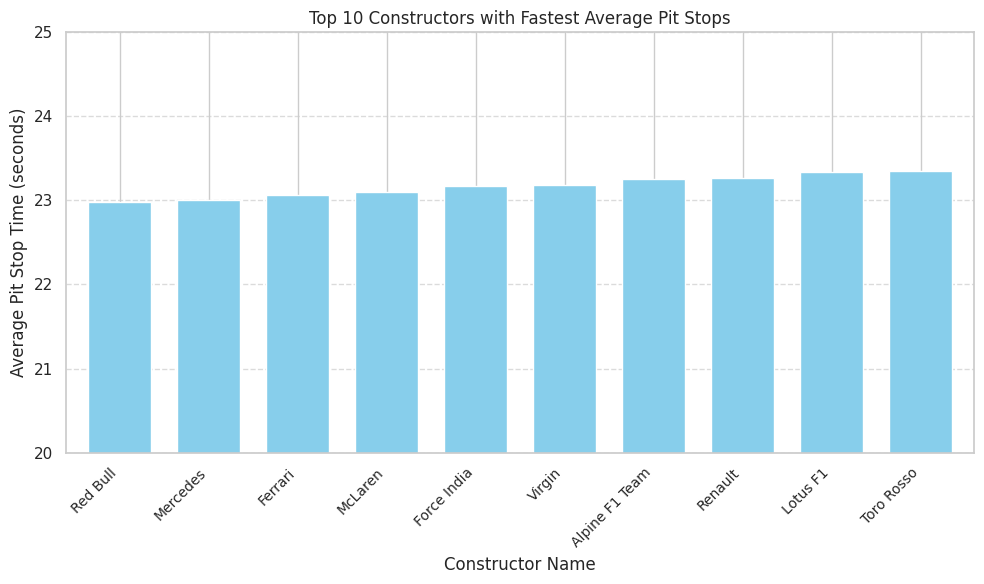

In [100]:
pitStops_with_constructors = pitStops.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
pitStops_with_constructors = pitStops_with_constructors.rename(columns={'name_y': 'constructorName'}) \
    .query('constructorName != "Lotus" & year > 2010 & seconds < 30')

best_constructors = pitStops_with_constructors.groupby('constructorName')['seconds'].mean().sort_values().head(10)


best_constructors.plot(kind='bar', color='skyblue', width=0.7, figsize=(10, 6))
plt.title('Top 10 Constructors with Fastest Average Pit Stops')
plt.xlabel('Constructor Name')
plt.ylabel('Average Pit Stop Time (seconds)')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.ylim(20, 25)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Output: Red Bull leads the chart with the fastest average pit times, reinforcing its reputation for quick pit lane performance.

# 6. What is the average pit stop duration by season?
This line plot shows average pit stop durations across seasons.



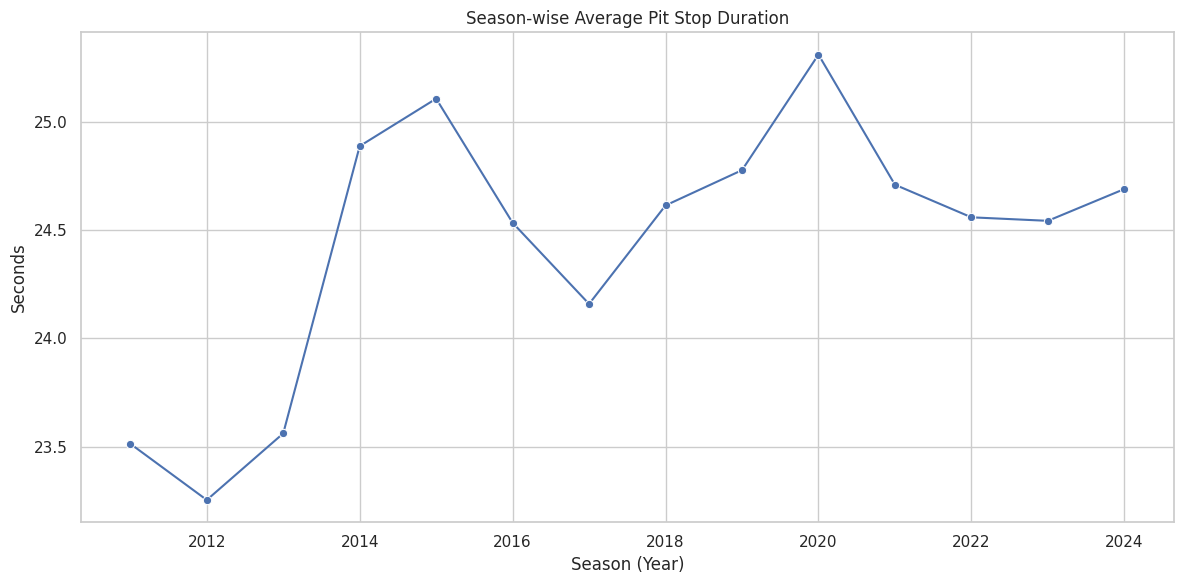

In [101]:
season_avg = pitStops.groupby('year')['seconds'].mean().reset_index()
sns.lineplot(data=season_avg, x='year', y='seconds', marker='o')
plt.title('Season-wise Average Pit Stop Duration')
plt.ylabel('Seconds')
plt.xlabel('Season (Year)')
plt.tight_layout()
plt.show()


Output: There’s a noticeable decline in average pit stop times from early 2000s onwards, stabilizing around 2.5 seconds in the 2010s.

# 7. How does the number of pit stops correlate with race outcomes?
This scatter plot shows the relationship between number of pit stops and race position.

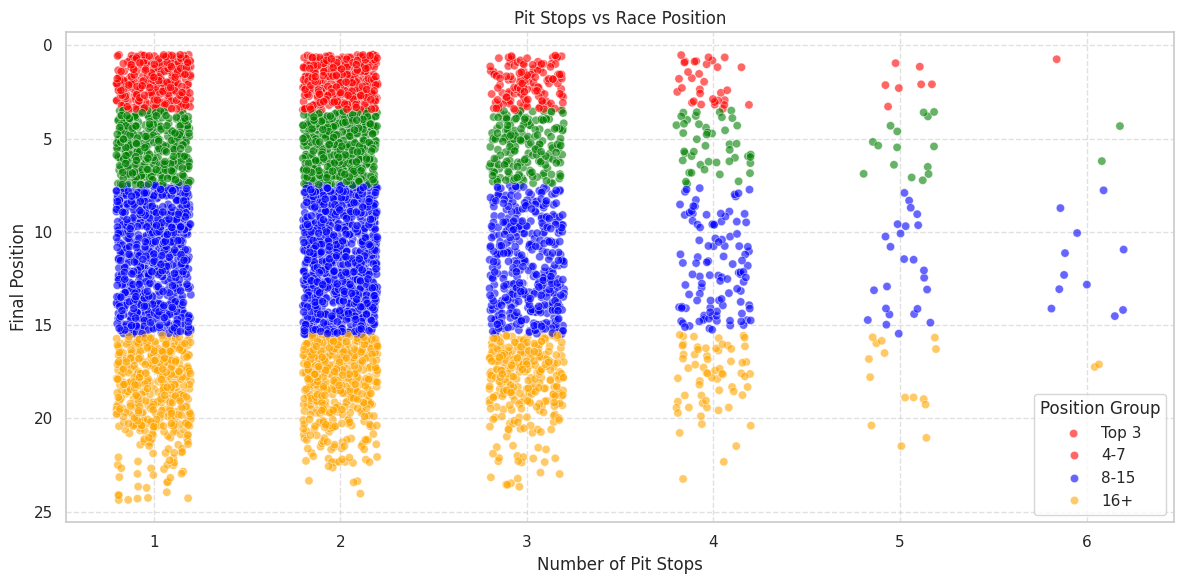

In [113]:
df = pitStops.groupby(['raceId', 'driverId']).size().reset_index(name='stopCount')
df = df.merge(results[['raceId', 'driverId', 'positionOrder']], on=['raceId', 'driverId']).dropna()
df = df[df['positionOrder'] > 0]
np.random.seed(0)
df['x'] = df['stopCount'] + np.random.uniform(-0.2, 0.2, len(df))
df['y'] = df['positionOrder'] + np.random.uniform(-0.5, 0.5, len(df))
df['color'] = df['positionOrder'].apply(lambda x: 'red' if x <= 3 else 'green' if x <= 7 else 'blue' if x <= 15 else 'orange')

sns.scatterplot(data=df, x='x', y='y', hue='color', palette={'red':'red','green':'green','blue':'blue','orange':'orange'}, alpha=0.6)
plt.gca().invert_yaxis()
plt.title('Pit Stops vs Race Position')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Final Position')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Position Group', labels=['Top 3', '4-7', '8-15', '16+'])
plt.tight_layout()
plt.show()



# 8. What is the fastest pit stop ever recorded in F1?
This prints out the fastest individual pit stop time recorded in the dataset.

In [103]:
fastest = pitStops.loc[pitStops['seconds'].idxmin()]
print("Fastest pit stop:", fastest['seconds'], "seconds by constructor:", fastest['name'], "in year:", fastest['year'])


Fastest pit stop: 12.897 seconds by constructor: Abu Dhabi Grand Prix in year: 2011


# 9. What is the trend of total number of pit stops per year?
This line chart displays how the total number of pit stops per season has changed over time.

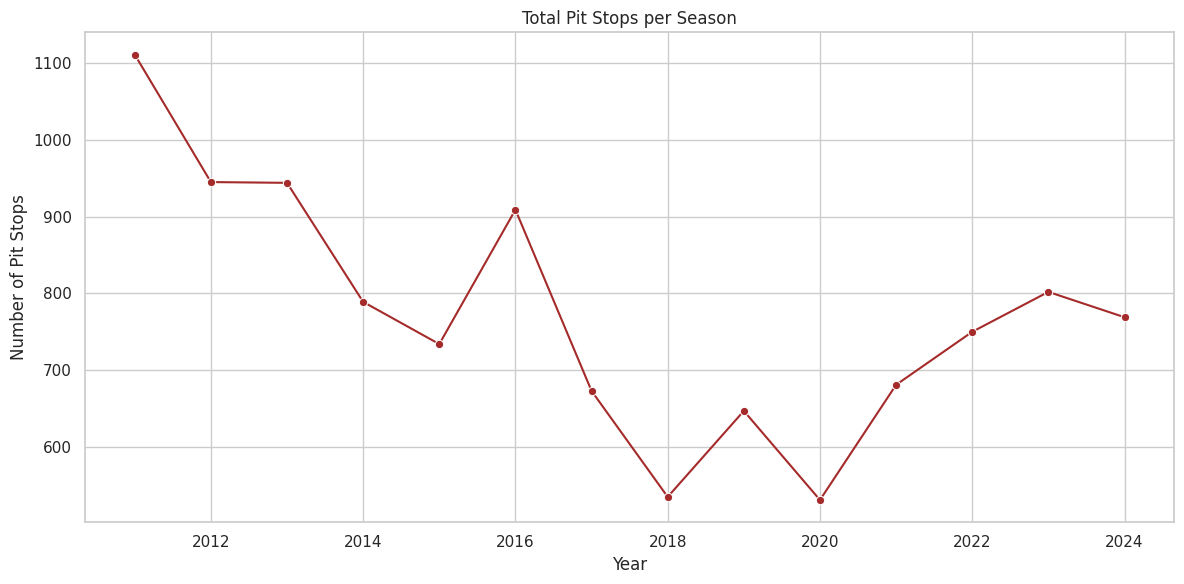

In [104]:
total_stops = pitStops.groupby('year').size().reset_index(name='count')
sns.lineplot(data=total_stops, x='year', y='count', marker='o', color='brown')
plt.title('Total Pit Stops per Season')
plt.xlabel('Year')
plt.ylabel('Number of Pit Stops')
plt.tight_layout()
plt.show()


Output: There’s a rise in total pit stops over the years, peaking around the 2010s, reflecting longer races or strategy shifts

# 10. Which circuit has the shortest average pit stop duration each year?

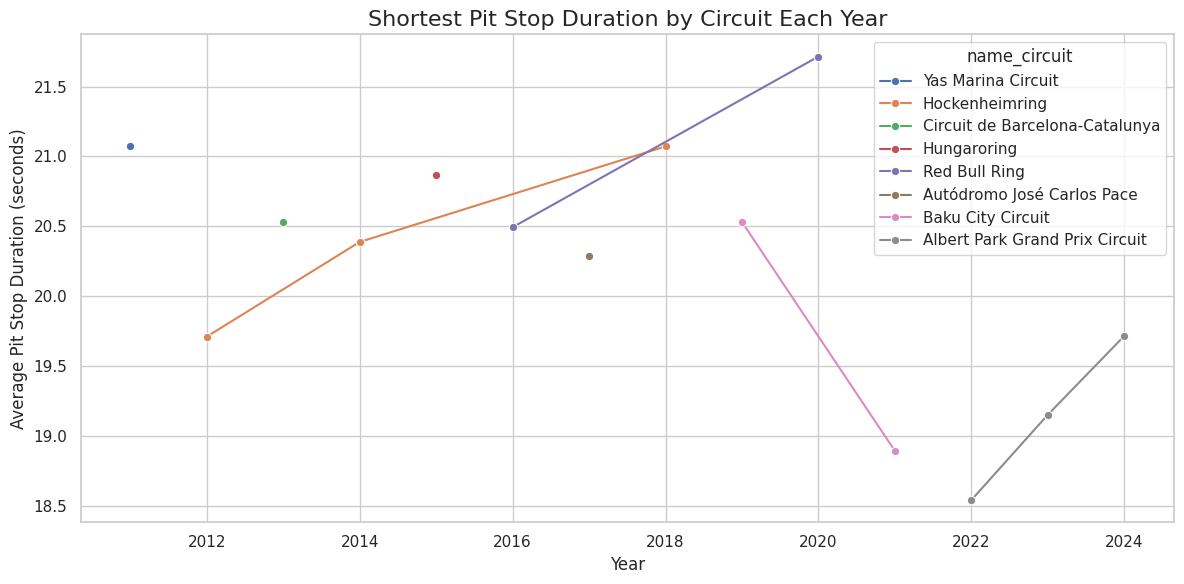

In [105]:

mean_by_circuit_year = pitStops.groupby(['year', 'name_circuit'])['seconds'].mean().reset_index()

shortest_pitstop_circuit = mean_by_circuit_year.loc[mean_by_circuit_year.groupby('year')['seconds'].idxmin()]

plt.figure(figsize=(12, 6))
sns.lineplot(data=shortest_pitstop_circuit, x='year', y='seconds', hue='name_circuit', marker='o')

plt.title('Shortest Pit Stop Duration by Circuit Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Pit Stop Duration (seconds)', fontsize=12)
plt.tight_layout()
plt.show()
